In [1]:
from index_tracking import *

import yahoo_fin.stock_info as si
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import gurobipy as gp
from gurobipy import GRB
import numpy as np

%load_ext autoreload
%autoreload 1
%aimport index_tracking

In [2]:
ticker_index = "^BVSP"
tickers_dataframe = get_IBOV_from_B3()

n_months = 12

start_date = "2022-01-01"
end_date = "2024-01-01"

c:\Users\Arthur Araujo\localrepositories\aa-index_tracking\index_tracking.py:301: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df1 = pd.read_html(table)[0]


In [3]:
tickers_dataframe  # Data from the B3 website

,Code,Stock,Type,Theoretical Quantity,Part. (%)
0,RRRP3,3R PETROLEUM,ON NM,2.356656e+08,0.372
1,ALOS3,ALLOS,ON NM,5.326166e+08,0.547
2,ALPA4,ALPARGATAS,PN N1,1.767340e+08,0.077
3,ABEV3,AMBEV S/A,ON,4.394246e+09,2.483
4,ARZZ3,AREZZO CO,ON NM,6.230589e+07,0.156
...,...,...,...,...,...
81,VALE3,VALE,ON NM,4.196924e+09,12.567
82,VAMO3,VAMOS,ON NM,4.213833e+08,0.145
83,VBBR3,VIBRA,ON ED NM,1.114413e+09,1.221
84,WEGE3,WEG,ON NM,1.481593e+09,2.681


In [4]:
tickers_list = []
for ticker in tickers_dataframe.Code:

    tickers_list.append(ticker + ".SA")

In [5]:
index_historical = get_ticker_data_yfinance(ticker_index, start_date, end_date)
stocks_historical = get_stocks_data_yfinance(tickers_list, start_date, end_date)

# index_historical = get_ticker_data_yfinance(ticker_index, n_months)
# stocks_historical = get_stocks_data_yfinance(tickers_list, n_months)


# index_historical = get_ticker_data_yahoofin(ticker_index, start_date, end_date)
# stocks_historical = get_stocks_data_yahoofin(tickers_list, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [6]:
# index_historical.index = index_historical.index.tz_convert("UTC")
# for dict_key in stocks_historical.keys():
#     stocks_historical[dict_key].index = stocks_historical[dict_key].index.tz_convert(
#         "UTC"
#     )

In [7]:
fill_missing_values(index_historical, stocks_historical)

In [8]:
cutoff_date = "2022-07-01"

index_historical_train, stocks_historical_train = create_train_dataset(
    index_historical, stocks_historical, cutoff_date
)

index_historical_test, stocks_historical_test = create_test_dataset(
    index_historical, stocks_historical, cutoff_date
)

Text(0, 0.5, 'Value [$]')

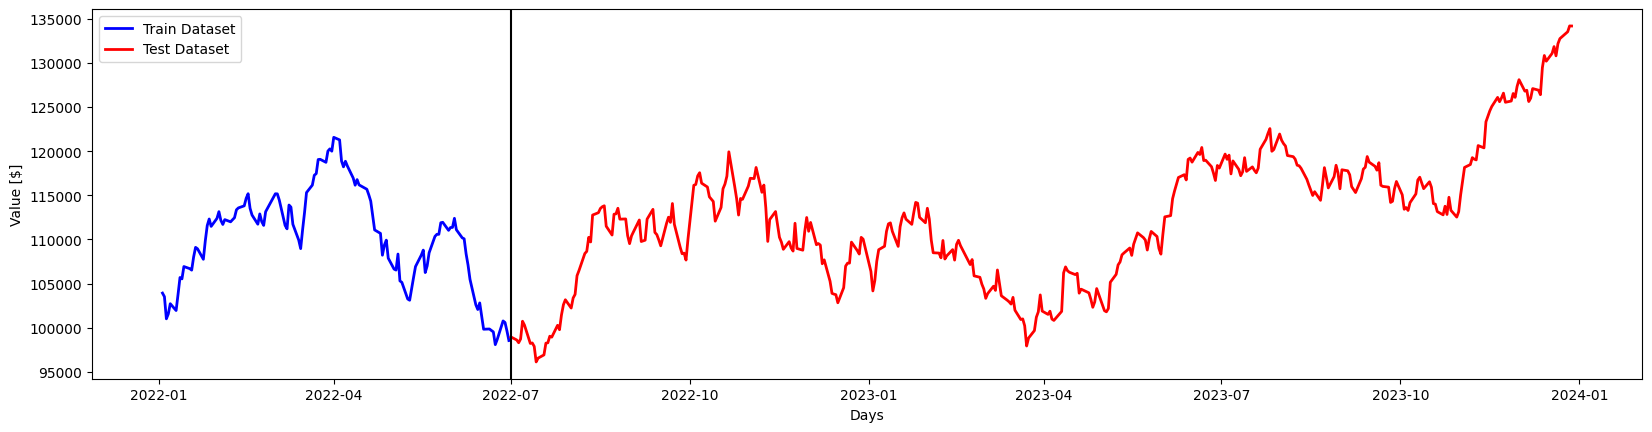

In [9]:
plt.figure().set_figwidth(20)
plt.plot(
    index_historical_train.index,
    index_historical_train,
    label="Train Dataset",
    linewidth=2,
    color="b",
)

plt.plot(
    index_historical_test.index,
    index_historical_test,
    label="Test Dataset",
    linewidth=2,
    color="r",
)

plt.axvline(x=pd.to_datetime(cutoff_date), color="black")

plt.legend()
plt.xlabel("Days")
plt.ylabel("Value [$]")

## Gurobi

\begin{align*} 
min\frac{1}{T}\sum_{t=1}^T (\sum_{i \in I}w_i r_{t,i} - R_t)^2 \\ 
\end{align*}

In [10]:
# def sort_dict_by_values(d, reverse=True):
#     return {
#         k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=reverse)
#     }


# sort_dict_by_values(w1)

In [11]:
w_small_K1 = create_gurobi_model(
    tickers_list,
    index_historical_train,
    stocks_historical_train,
    5,
)

w_small_K1

Restricted license - for non-production use only - expires 2025-11-24


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1235U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 88 rows, 172 columns and 344 nonzeros
Model fingerprint: 0x611ff33d
Model has 3655 quadratic objective terms
Variable types: 86 continuous, 86 integer (86 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e-05, 1e-03]
  QObjective range [3e-07, 8e-03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Found heuristic solution: objective 0.0006849
Presolve time: 0.00s
Presolved: 88 rows, 172 columns, 344 nonzeros
Presolved model has 3655 quadratic objective terms
Variable types: 86 continuous, 86 integer (86 binary)

Root relaxation: objective 2.524449e-06, 387 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Wo

{'SOMA3.SA': 0.09015179181577479,
 'ITSA4.SA': 0.3553077399453095,
 'RENT3.SA': 0.13785549064677255,
 'SBSP3.SA': 0.16042928725854344,
 'VALE3.SA': 0.25625569033359974}

In [12]:
w_small_K2 = create_gurobi_model(
    tickers_list,
    index_historical_train,
    stocks_historical_train,
    4,
)

w_small_K2

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1235U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 88 rows, 172 columns and 344 nonzeros
Model fingerprint: 0x4d79bd05
Model has 3655 quadratic objective terms
Variable types: 86 continuous, 86 integer (86 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e-05, 1e-03]
  QObjective range [3e-07, 8e-03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 0.0006849
Presolve time: 0.01s
Presolved: 88 rows, 172 columns, 344 nonzeros
Presolved model has 3655 quadratic objective terms
Variable types: 86 continuous, 86 integer (86 binary)

Root relaxation: objective 2.524449e-06, 387 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Wo

{'ITSA4.SA': 0.35727444512678486,
 'RENT3.SA': 0.22276107732155706,
 'SBSP3.SA': 0.17276198017793903,
 'VALE3.SA': 0.24720249737371894}

In [19]:
w_small_K3 = create_gurobi_model(
    tickers_list,
    index_historical_train,
    stocks_historical_train,
    3,
)

w_small_K3

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1235U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 88 rows, 172 columns and 344 nonzeros
Model fingerprint: 0x71b62a80
Model has 3655 quadratic objective terms
Variable types: 86 continuous, 86 integer (86 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e-05, 1e-03]
  QObjective range [3e-07, 8e-03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]
Found heuristic solution: objective 0.0006849
Presolve time: 0.00s
Presolved: 88 rows, 172 columns, 344 nonzeros
Presolved model has 3655 quadratic objective terms
Variable types: 86 continuous, 86 integer (86 binary)

Root relaxation: objective 2.524449e-06, 387 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Wo

{'ITSA4.SA': 0.4562217315581718,
 'RENT3.SA': 0.27140481578430964,
 'VALE3.SA': 0.2723734526575185}

In [21]:
w_small_K4 = create_gurobi_model(
    tickers_list,
    index_historical_train,
    stocks_historical_train,
    2,
)

w_small_K4

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1235U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 88 rows, 172 columns and 344 nonzeros
Model fingerprint: 0xa24cab10
Model has 3655 quadratic objective terms
Variable types: 86 continuous, 86 integer (86 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e-05, 1e-03]
  QObjective range [3e-07, 8e-03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+00]
Found heuristic solution: objective 0.0006849
Presolve time: 0.00s
Presolved: 88 rows, 172 columns, 344 nonzeros
Presolved model has 3655 quadratic objective terms
Variable types: 86 continuous, 86 integer (86 binary)

Root relaxation: objective 2.524449e-06, 387 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Wo

{'ITSA4.SA': 0.7339262144208001, 'VALE3.SA': 0.2660737855792}

In [13]:
w0 = create_gurobi_model(
    tickers_list,
    index_historical_train,
    stocks_historical_train,
    40,
)

w0

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1235U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 88 rows, 172 columns and 344 nonzeros
Model fingerprint: 0x2edcdcb4
Model has 3655 quadratic objective terms
Variable types: 86 continuous, 86 integer (86 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e-05, 1e-03]
  QObjective range [3e-07, 8e-03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+01]
Found heuristic solution: objective 0.0006849
Presolve time: 0.00s
Presolved: 88 rows, 172 columns, 344 nonzeros
Presolved model has 3655 quadratic objective terms
Variable types: 86 continuous, 86 integer (86 binary)

Root relaxation: objective 2.524449e-06, 387 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Wo

{'ABEV3.SA': 0.02387463983850443,
 'ARZZ3.SA': 0.029432685602018678,
 'B3SA3.SA': 0.02619686343422638,
 'BBDC3.SA': 0.043465496745501306,
 'BBDC4.SA': 0.032622913608533706,
 'BRAP4.SA': 0.028238078429033267,
 'BPAC11.SA': 0.010554035106486306,
 'CCRO3.SA': 0.009595421078155118,
 'CSAN3.SA': 0.024644131218503174,
 'DXCO3.SA': 0.016700703348835538,
 'ELET3.SA': 0.021630923290727407,
 'ENGI11.SA': 0.01703397098186164,
 'ENEV3.SA': 0.0303787448602199,
 'EGIE3.SA': 0.01980187359733283,
 'EZTC3.SA': 0.011015389866441853,
 'FLRY3.SA': 0.012198082417391263,
 'GGBR4.SA': 0.029056226362138074,
 'NTCO3.SA': 0.013180982104722063,
 'HAPV3.SA': 0.011970378618200281,
 'IRBR3.SA': 0.008636471082524409,
 'ITUB4.SA': 0.08447479301080636,
 'RENT3.SA': 0.04100752407612873,
 'LREN3.SA': 0.011212568877525817,
 'LWSA3.SA': 0.009051760127500183,
 'MGLU3.SA': 0.015600839195375815,
 'MRFG3.SA': 0.013073224208808595,
 'BEEF3.SA': 0.013126469236662709,
 'MRVE3.SA': 0.00836874819540872,
 'PETR4.SA': 0.074313105738

In [14]:
w1 = create_gurobi_model(
    tickers_list,
    index_historical_train,
    stocks_historical_train,
    50,
)

w1

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1235U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 88 rows, 172 columns and 344 nonzeros
Model fingerprint: 0x4546ac4f
Model has 3655 quadratic objective terms
Variable types: 86 continuous, 86 integer (86 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e-05, 1e-03]
  QObjective range [3e-07, 8e-03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]
Found heuristic solution: objective 0.0006849
Presolve time: 0.00s
Presolved: 88 rows, 172 columns, 344 nonzeros
Presolved model has 3655 quadratic objective terms
Variable types: 86 continuous, 86 integer (86 binary)

Root relaxation: objective 2.524449e-06, 387 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Wo

{'ALPA4.SA': 0.0037979666443108753,
 'ABEV3.SA': 0.016822560301246098,
 'ARZZ3.SA': 0.02245038404176535,
 'B3SA3.SA': 0.027808243286617445,
 'BBDC3.SA': 0.030446896885552393,
 'BBDC4.SA': 0.0409030447069635,
 'BRAP4.SA': 0.020759548709156955,
 'BBAS3.SA': 0.007115232237325356,
 'BRFS3.SA': 0.002476931515058094,
 'BPAC11.SA': 0.008802465764858743,
 'CCRO3.SA': 0.009987682665836599,
 'CSAN3.SA': 0.029808582078461068,
 'CYRE3.SA': 0.017560744025648934,
 'DXCO3.SA': 0.012843993107645562,
 'ELET3.SA': 0.019877094113232685,
 'EMBR3.SA': 0.0035900356093190207,
 'ENGI11.SA': 0.016159849051106862,
 'ENEV3.SA': 0.03066327931360361,
 'EGIE3.SA': 0.012553351434201561,
 'EQTL3.SA': 0.014791263886761009,
 'FLRY3.SA': 0.012363152202216064,
 'GGBR4.SA': 0.025971607595628273,
 'NTCO3.SA': 0.011845470538101635,
 'HAPV3.SA': 0.012885469259652916,
 'IRBR3.SA': 0.0051779145534830194,
 'ITUB4.SA': 0.08656249037325568,
 'JBSS3.SA': 0.009182232805438489,
 'RENT3.SA': 0.03873654924799766,
 'LREN3.SA': 0.007268

In [15]:
w2 = create_gurobi_model(
    tickers_list,
    index_historical_train,
    stocks_historical_train,
    70,
)

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1235U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 88 rows, 172 columns and 344 nonzeros
Model fingerprint: 0x596097d5
Model has 3655 quadratic objective terms
Variable types: 86 continuous, 86 integer (86 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e-05, 1e-03]
  QObjective range [3e-07, 8e-03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 7e+01]
Found heuristic solution: objective 0.0006849
Presolve time: 0.00s
Presolved: 88 rows, 172 columns, 344 nonzeros
Presolved model has 3655 quadratic objective terms
Variable types: 86 continuous, 86 integer (86 binary)

Root relaxation: objective 2.524449e-06, 387 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Wo

In [16]:
w3 = create_gurobi_model(
    tickers_list,
    index_historical_train,
    stocks_historical_train,
    90,
)

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1235U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 88 rows, 172 columns and 344 nonzeros
Model fingerprint: 0xca2ffb4f
Model has 3655 quadratic objective terms
Variable types: 86 continuous, 86 integer (86 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e-05, 1e-03]
  QObjective range [3e-07, 8e-03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+01]
Found heuristic solution: objective 0.0006849
Presolve removed 87 rows and 87 columns
Presolve time: 0.00s
Presolved: 1 rows, 85 columns, 85 nonzeros
Presolved model has 3655 quadratic objective terms
Variable types: 85 continuous, 0 integer (0 binary)
Root relaxation presolve time: 0.01s
Root relaxation presolved: 1 rows, 85 columns, 85 nonzeros
Root relaxation presolved mod

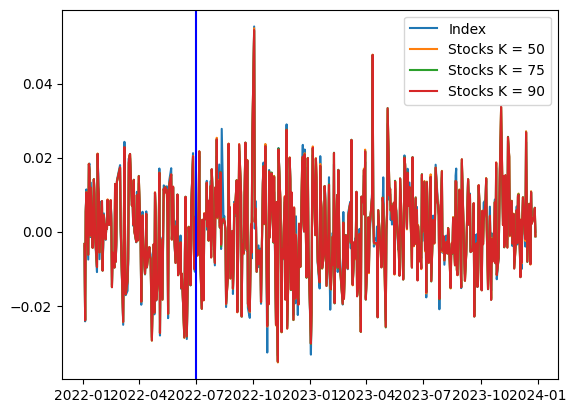

In [17]:
plt.plot(
    (index_historical.drop(index_historical.index[0])).index,
    get_index_return(index_historical),
    label="Index",
)
plt.plot(
    (index_historical.drop(index_historical.index[0])).index,
    get_all_selected_stocks_return(stocks_historical, w1, index_historical),
    label="Stocks K = " + str(50),
)
plt.plot(
    (index_historical.drop(index_historical.index[0])).index,
    get_all_selected_stocks_return(stocks_historical, w2, index_historical),
    label="Stocks K = " + str(75),
)
plt.plot(
    (index_historical.drop(index_historical.index[0])).index,
    get_all_selected_stocks_return(stocks_historical, w3, index_historical),
    label="Stocks K = " + str(90),
)
plt.axvline(x=pd.to_datetime(cutoff_date), color="b")
plt.legend()

### TEST DATASET ONLY:

Text(0, 0.5, 'Value [$]')

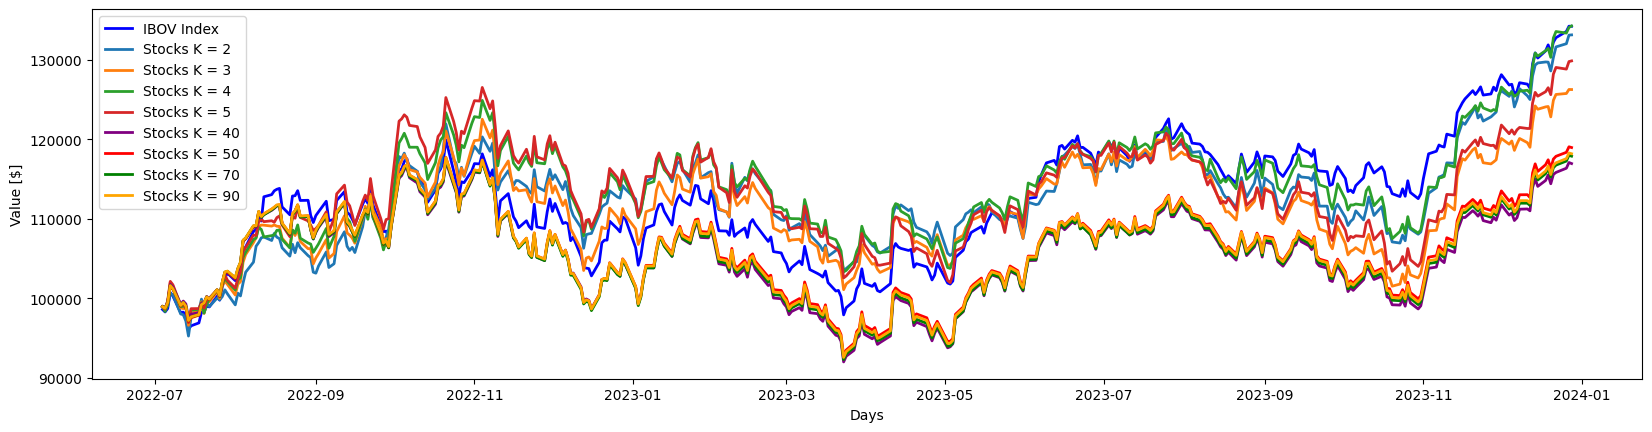

In [23]:
plt.figure().set_figwidth(20)
plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    index_historical_test.drop(index_historical_test.index[0]),
    label="IBOV Index",
    linewidth=2,
    color="b",
)


plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_all_selected_stocks_accumulated_return(
        stocks_historical_test, w_small_K4, index_historical_test
    ),
    label="Stocks K = " + str(2),
    linewidth=2,
)
plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_all_selected_stocks_accumulated_return(
        stocks_historical_test, w_small_K3, index_historical_test
    ),
    label="Stocks K = " + str(3),
    linewidth=2,
)
plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_all_selected_stocks_accumulated_return(
        stocks_historical_test, w_small_K2, index_historical_test
    ),
    label="Stocks K = " + str(4),
    linewidth=2,
)
plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_all_selected_stocks_accumulated_return(
        stocks_historical_test, w_small_K1, index_historical_test
    ),
    label="Stocks K = " + str(5),
    linewidth=2,
)


plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_all_selected_stocks_accumulated_return(
        stocks_historical_test, w0, index_historical_test
    ),
    label="Stocks K = " + str(40),
    linewidth=2,
    color="purple",
)

plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_all_selected_stocks_accumulated_return(
        stocks_historical_test, w1, index_historical_test
    ),
    label="Stocks K = " + str(50),
    linewidth=2,
    color="red",
)
plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_all_selected_stocks_accumulated_return(
        stocks_historical_test, w2, index_historical_test
    ),
    label="Stocks K = " + str(70),
    linewidth=2,
    color="green",
)
plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_all_selected_stocks_accumulated_return(
        stocks_historical_test, w3, index_historical_test
    ),
    label="Stocks K = " + str(90),
    linewidth=2,
    color="orange",
)


plt.legend()
plt.xlabel("Days")
plt.ylabel("Value [$]")

In [57]:
# Export to csv
df_w1 = pd.DataFrame.from_dict(w0, orient="index", columns=["W"])
df_w1.insert(0, "K", "40")
df_w1 = df_w1.rename_axis("Ticker").reset_index()
df_w1 = df_w1.set_index(["K", "Ticker"])

df_w2 = pd.DataFrame.from_dict(w1, orient="index", columns=["W"])
df_w2.insert(0, "K", "50")
df_w2 = df_w2.rename_axis("Ticker").reset_index()
df_w2 = df_w2.set_index(["K", "Ticker"])

df_w3 = pd.DataFrame.from_dict(w2, orient="index", columns=["W"])
df_w3.insert(0, "K", "70")
df_w3 = df_w3.rename_axis("Ticker").reset_index()
df_w3 = df_w3.set_index(["K", "Ticker"])

df_w4 = pd.DataFrame.from_dict(w3, orient="index", columns=["W"])
df_w4.insert(0, "K", "90")
df_w4 = df_w4.rename_axis("Ticker").reset_index()
df_w4 = df_w4.set_index(["K", "Ticker"])

df_w_small_K1 = pd.DataFrame.from_dict(w2, orient="index", columns=["W"])
df_w_small_K1.insert(0, "K", "5")
df_w_small_K1 = df_w_small_K1.rename_axis("Ticker").reset_index()
df_w_small_K1 = df_w_small_K1.set_index(["K", "Ticker"])

df_w_small_K2 = pd.DataFrame.from_dict(w2, orient="index", columns=["W"])
df_w_small_K2.insert(0, "K", "4")
df_w_small_K2 = df_w_small_K2.rename_axis("Ticker").reset_index()
df_w_small_K2 = df_w_small_K2.set_index(["K", "Ticker"])

df_w_small_K3 = pd.DataFrame.from_dict(w2, orient="index", columns=["W"])
df_w_small_K3.insert(0, "K", "3")
df_w_small_K3 = df_w_small_K3.rename_axis("Ticker").reset_index()
df_w_small_K3 = df_w_small_K3.set_index(["K", "Ticker"])

df_w_small_K4 = pd.DataFrame.from_dict(w2, orient="index", columns=["W"])
df_w_small_K4.insert(0, "K", "2")
df_w_small_K4 = df_w_small_K4.rename_axis("Ticker").reset_index()
df_w_small_K4 = df_w_small_K4.set_index(["K", "Ticker"])


df = pd.concat(
    [
        df_w_small_K1,
        df_w_small_K2,
        df_w_small_K3,
        df_w_small_K4,
        df_w1,
        df_w2,
        df_w3,
        df_w4,
    ],
    ignore_index=False,
)
df.to_csv("IBOV.csv", index=True)
df

W
K  Ticker                
5  ALPA4.SA  3.417741e-03
   ABEV3.SA  1.625414e-02
   ARZZ3.SA  2.330413e-02
   B3SA3.SA  2.826329e-02
   BBDC3.SA  3.513158e-02
...                   ...
90 VALE3.SA  1.402954e-01
   VAMO3.SA  5.236745e-03
   VBBR3.SA  7.553187e-03
   WEGE3.SA  9.765422e-03
   YDUQ3.SA  4.439483e-07

[441 rows x 1 columns]

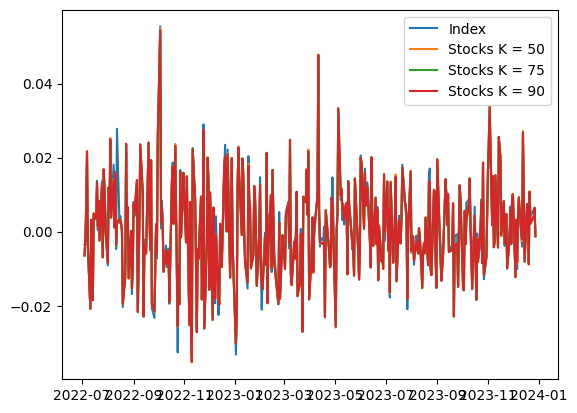

In [ ]:
plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_index_return(index_historical_test),
    label="Index",
)
plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_all_selected_stocks_return(stocks_historical_test, w1, index_historical_test),
    label="Stocks K = " + str(50),
)
plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_all_selected_stocks_return(stocks_historical_test, w2, index_historical_test),
    label="Stocks K = " + str(75),
)
plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_all_selected_stocks_return(stocks_historical_test, w3, index_historical_test),
    label="Stocks K = " + str(90),
)
plt.legend()

# DIF TRAIN PERIOD

In [ ]:
cutoff_date = "2022-04-01"

index_historical_train, stocks_historical_train = create_train_dataset(
    index_historical, stocks_historical, cutoff_date
)

#### Models for k = 40, 50 , 70 , 90

In [ ]:
w12 = create_gurobi_model(
    tickers_list,
    index_historical_train,
    stocks_historical_train,
    40,
)

# w22 = create_gurobi_model(
#     tickers_list,
#     index_historical_train,
#     stocks_historical_train,
#     70,
# )

# w32 = create_gurobi_model(
#     tickers_list,
#     index_historical_train,
#     stocks_historical_train,
#     90,
# )

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1235U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 88 rows, 172 columns and 344 nonzeros
Model fingerprint: 0x0a9769f3
Model has 3655 quadratic objective terms
Variable types: 86 continuous, 86 integer (86 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-06, 6e-04]
  QObjective range [1e-07, 5e-03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+01]
Found heuristic solution: objective 0.0004460
Presolve time: 0.00s
Presolved: 88 rows, 172 columns, 344 nonzeros
Presolved model has 3655 quadratic objective terms
Variable types: 86 continuous, 86 integer (86 binary)

Root relaxation: objective 3.559361e-07, 597 iterations, 0.00 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Wo

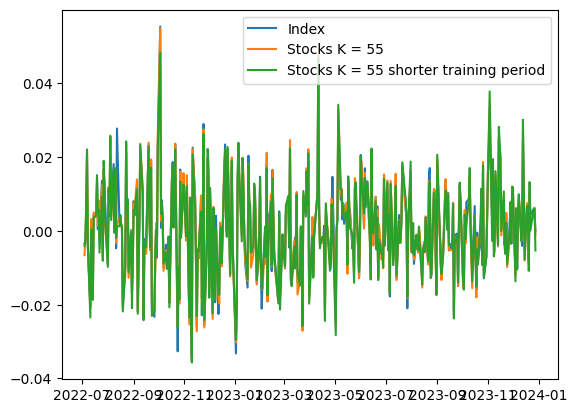

In [ ]:
plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_index_return(index_historical_test),
    label="Index",
)

plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_all_selected_stocks_return(stocks_historical_test, w1, index_historical_test),
    label="Stocks K = " + str(55),
)
""" plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_all_selected_stocks_return(stocks_historical_test, w2, index_historical_test),
    label="Stocks K = " + str(75),
)
plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_all_selected_stocks_return(stocks_historical_test, w3, index_historical_test),
    label="Stocks K = " + str(90),
) """

plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_all_selected_stocks_return(stocks_historical_test, w12, index_historical_test),
    label="Stocks K = " + str(55) + " shorter training period",
)
""" plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_all_selected_stocks_return(stocks_historical_test, w22, index_historical_test),
    label="Stocks K = " + str(75) + ' shorter training period',
)
plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_all_selected_stocks_return(stocks_historical_test, w32, index_historical_test),
    label="Stocks K = " + str(90) + ' shorter training period', 
)"""

plt.legend()

Text(0, 0.5, 'Value [$]')

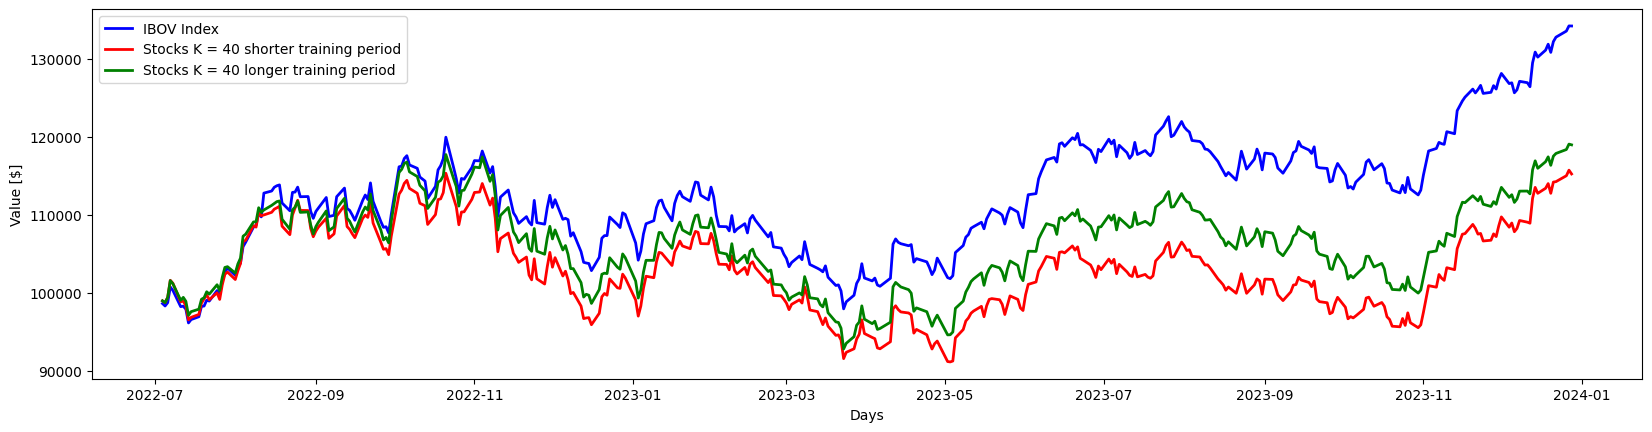

In [ ]:
plt.figure().set_figwidth(20)
plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    index_historical_test.drop(index_historical_test.index[0]),
    label="IBOV Index",
    linewidth=2,
    color="b",
)

plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_all_selected_stocks_accumulated_return(
        stocks_historical_test, w12, index_historical_test
    ),
    label="Stocks K = " + str(40) + " shorter training period",
    linewidth=2,
    color="red",
)

plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_all_selected_stocks_accumulated_return(
        stocks_historical_test, w1, index_historical_test
    ),
    label="Stocks K = " + str(40) + " longer training period",
    linewidth=2,
    color="green",
)


plt.legend()
plt.xlabel("Days")
plt.ylabel("Value [$]")

# Gurobi model with value limit :

In [ ]:
max_value = 10000  # Value in of dollars

In [ ]:
stocks_to_buy = buy_exact_stocks(max_value, w1, get_last_quotes(w1.keys()))
stocks_to_buy

{'ALPA4.SA': 4.0,
 'ABEV3.SA': 14.0,
 'ARZZ3.SA': 4.0,
 'B3SA3.SA': 24.0,
 'BBDC3.SA': 25.0,
 'BBDC4.SA': 30.0,
 'BRAP4.SA': 9.0,
 'BBAS3.SA': 2.0,
 'BRFS3.SA': 1.0,
 'BPAC11.SA': 2.0,
 'CCRO3.SA': 7.0,
 'CSAN3.SA': 20.0,
 'CYRE3.SA': 8.0,
 'DXCO3.SA': 17.0,
 'ELET3.SA': 5.0,
 'EMBR3.SA': 1.0,
 'ENGI11.SA': 3.0,
 'ENEV3.SA': 24.0,
 'EGIE3.SA': 3.0,
 'EQTL3.SA': 4.0,
 'FLRY3.SA': 8.0,
 'GGBR4.SA': 13.0,
 'NTCO3.SA': 7.0,
 'HAPV3.SA': 35.0,
 'IRBR3.SA': 1.0,
 'ITUB4.SA': 27.0,
 'JBSS3.SA': 4.0,
 'RENT3.SA': 7.0,
 'LREN3.SA': 4.0,
 'LWSA3.SA': 13.0,
 'MGLU3.SA': 107.0,
 'MRFG3.SA': 9.0,
 'BEEF3.SA': 18.0,
 'PETR3.SA': 2.0,
 'PETR4.SA': 15.0,
 'PRIO3.SA': 4.0,
 'RADL3.SA': 4.0,
 'RDOR3.SA': 2.0,
 'SBSP3.SA': 3.0,
 'SANB11.SA': 5.0,
 'SUZB3.SA': 2.0,
 'TAEE11.SA': 2.0,
 'TIMS3.SA': 6.0,
 'TOTS3.SA': 1.0,
 'TRPL4.SA': 6.0,
 'USIM5.SA': 13.0,
 'VALE3.SA': 22.0,
 'VAMO3.SA': 8.0,
 'VBBR3.SA': 2.0,
 'WEGE3.SA': 2.0}

In [ ]:
def calculate_total_price(stocks_to_buy, prices):
    total_price = sum(stocks_to_buy[stock] * prices[stock] for stock in stocks_to_buy)
    return total_price


total_price = calculate_total_price(
    stocks_to_buy, get_last_quotes(stocks_to_buy.keys())
)
print("Total price:", total_price)

Total price: 9345.820053577423


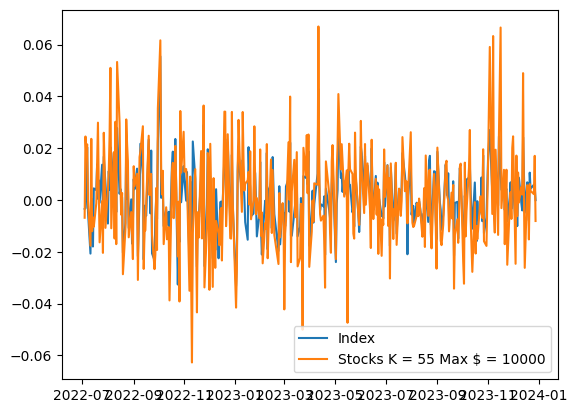

In [ ]:
plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_index_return(index_historical_test),
    label="Index",
)

plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_all_selected_stocks_return(
        stocks_historical_test, normalize_stocks(stocks_to_buy), index_historical_test
    ),
    label="Stocks K = " + str(55) + " Max $ = " + str(max_value),
)


plt.legend()

# Model with Asset allocation

In [ ]:
def create_period_dataset(index_historical, stocks_historical, start_date, end_date):
    index_historical_train = index_historical[start_date:end_date]

    stocks_historical_train = {}
    for dict_key in stocks_historical.keys():
        stocks_historical_train[dict_key] = stocks_historical[dict_key][
            start_date:end_date
        ]

    return index_historical_train, stocks_historical_train

In [ ]:
n_months = 4

start_dates = [
    "2022-01-01",
    "2022-05-01",
    "2022-09-01",
    "2023-01-01",
    "2023-05-01",
    "2023-07-01",
]

cutoff_dates = [
    "2022-07-01",
    "2022-11-01",
    "2023-03-01",
    "2023-07-01",
    "2023-11-01",
    "2024-01-01",
]

index_stocks_train_P = [None] * 6
index_stocks_test_P = [None] * 6

for i in range(5):

    index_historical_train, stocks_historical_train = create_period_dataset(
        index_historical, stocks_historical, start_dates[i], cutoff_dates[i]
    )

    index_historical_period, stocks_historical_period = create_period_dataset(
        index_historical, stocks_historical, cutoff_dates[i], cutoff_dates[i + 1]
    )

    index_stocks_train_P[i] = index_historical_train, stocks_historical_train
    index_stocks_test_P[i] = index_historical_period, stocks_historical_period

In [ ]:
w_allocation = []
for i in range(5):
    w_allocation.append(
        create_gurobi_model(
            tickers_list,
            index_stocks_train_P[i][0],
            index_stocks_train_P[i][1],
            40,
        )
    )

Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1235U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 88 rows, 172 columns and 344 nonzeros
Model fingerprint: 0xf186a382
Model has 3655 quadratic objective terms
Variable types: 86 continuous, 86 integer (86 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e-05, 1e-03]
  QObjective range [1e-06, 8e-03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+01]
Found heuristic solution: objective 0.0006849
Presolve time: 0.00s
Presolved: 88 rows, 172 columns, 344 nonzeros
Presolved model has 3655 quadratic objective terms
Variable types: 86 continuous, 86 integer (86 binary)

Root relaxation: objective 2.524523e-06, 372 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Wo

Text(0, 0.5, 'Value [$]')

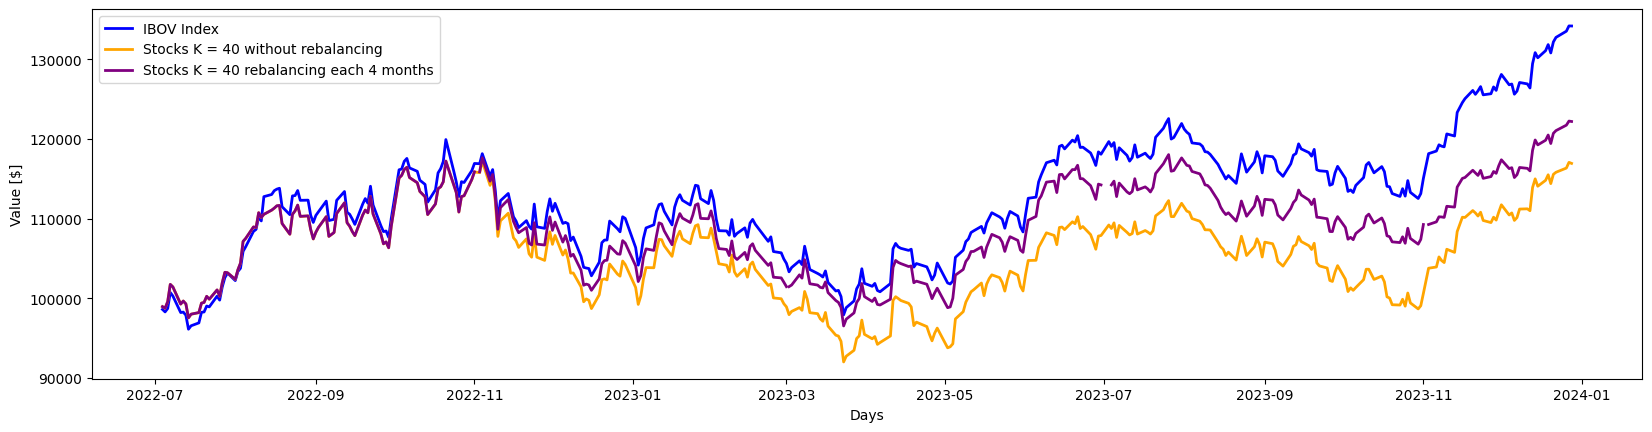

In [ ]:
plt.figure().set_figwidth(20)
plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    index_historical_test.drop(index_historical_test.index[0]),
    label="IBOV Index",
    linewidth=2,
    color="b",
)

plt.plot(
    (index_historical_test.drop(index_historical_test.index[0])).index,
    get_all_selected_stocks_accumulated_return(
        stocks_historical_test, w0, index_historical_test
    ),
    label="Stocks K = " + str(40) + " without rebalancing",
    linewidth=2,
    color="orange",
)

for pos in range(5):
    if pos == 0:
        plt.plot(
            (
                index_stocks_test_P[pos][0].drop(index_stocks_test_P[pos][0].index[0])
            ).index,
            get_all_selected_stocks_accumulated_return(
                index_stocks_test_P[pos][1],
                w_allocation[pos],
                index_stocks_test_P[pos][0],
            ),
            label="Stocks K = " + str(40) + " rebalancing each 4 months",
            linewidth=2,
            color="purple",
        )
        last_vector = get_all_selected_stocks_accumulated_return(
            index_stocks_test_P[pos][1], w_allocation[pos], index_stocks_test_P[pos][0]
        )
    else:
        plt.plot(
            (
                index_stocks_test_P[pos][0].drop(index_stocks_test_P[pos][0].index[0])
            ).index,
            get_all_selected_stocks_accumulated_return_rebalanceamento(
                index_stocks_test_P[pos][1],
                w_allocation[pos],
                index_stocks_test_P[pos][0],
                last_vector[last_vector.index.max()],
            ),
            linewidth=2,
            color="purple",
        )
        last_vector = get_all_selected_stocks_accumulated_return_rebalanceamento(
            index_stocks_test_P[pos][1],
            w_allocation[pos],
            index_stocks_test_P[pos][0],
            last_vector[last_vector.index.max()],
        )

plt.legend()
plt.xlabel("Days")
plt.ylabel("Value [$]")

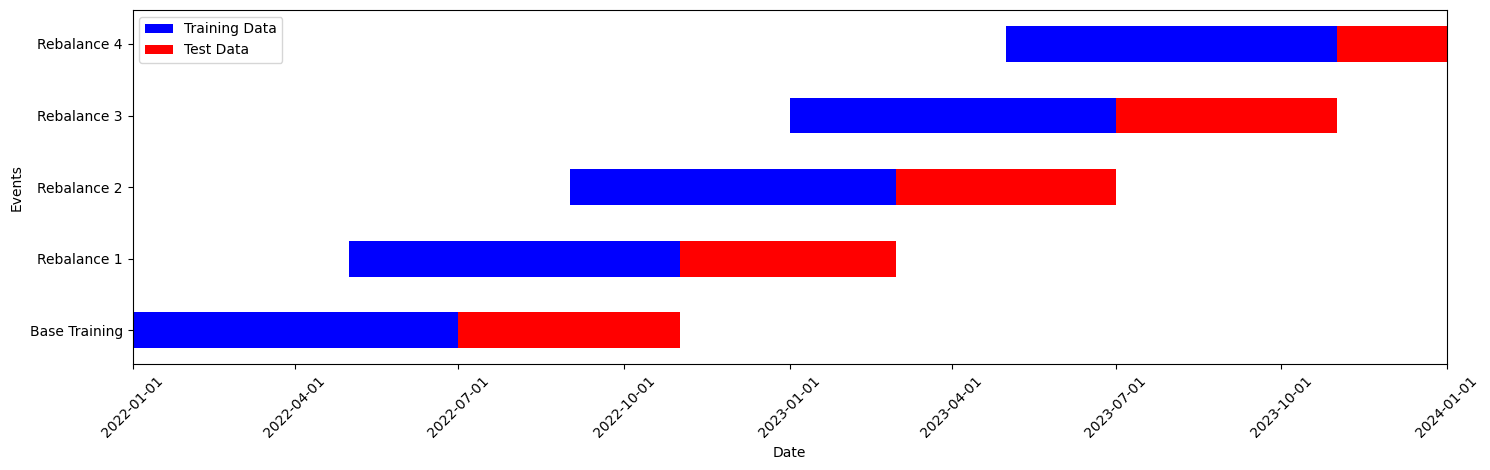

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Define the data
# start_date = datetime(2022, 1, 1)
start_dates = [
    datetime(2022, 1, 1),
    datetime(2022, 5, 1),
    datetime(2022, 9, 1),
    datetime(2023, 1, 1),
    datetime(2023, 5, 1),
    # datetime(2023, 9, 1),
]
end_dates = [
    datetime(2022, 7, 1),
    datetime(2022, 11, 1),
    datetime(2023, 3, 1),
    datetime(2023, 7, 1),
    datetime(2023, 11, 1),
    # datetime(2024, 1, 1),
]
labels = ["Base Training", "Rebalance 1", "Rebalance 2", "Rebalance 3", "Rebalance 4"]

# Create figure and axis objects
fig, ax = plt.subplots()
fig.set_figwidth(15)
# Plot each event
for i in range(len(end_dates)):
    if i == 0:
        duration = end_dates[i] - start_dates[i]
        ax.barh(
            labels[i],
            duration.days,
            left=start_dates[i],
            height=0.5,
            color="blue",
            label="Training Data",
        )
        ax.barh(
            labels[i],
            relativedelta(months=4),
            left=end_dates[i],
            height=0.5,
            color="red",
            label="Test Data",
        )
    else:
        duration = end_dates[i] - start_dates[i]
        ax.barh(labels[i], duration.days, left=start_dates[i], height=0.5, color="blue")
        ax.barh(
            labels[i],
            relativedelta(months=4),
            left=end_dates[i],
            height=0.5,
            color="red",
        )

# Set labels and title
ax.set_xlabel("Date")
ax.set_ylabel("Events")
# ax.set_title("Períodos de Treinamento e Teste")

# Set x-axis date format
date_format = "%Y-%m-%d"
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter(date_format))

# Set x-axis limits
min_date = min(start_dates)
max_date = max(end_dates)
ax.set_xlim(datetime(2022, 1, 1), datetime(2024, 1, 1))

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.legend()
plt.tight_layout()
plt.show()